## Prepare Data

In [21]:
import ntpath
import random
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2

In [2]:
datadir = 'sim_data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\center_2021_04_25_11_32_45_622.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\left_2021_04_25_11_32_45_622.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\right_2021_04_25_11_32_45_622.jpg,0.0,0.0,0.0,0.000004
1,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\center_2021_04_25_11_32_45_689.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\left_2021_04_25_11_32_45_689.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\right_2021_04_25_11_32_45_689.jpg,0.0,0.0,0.0,0.000001
2,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\center_2021_04_25_11_32_45_765.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\left_2021_04_25_11_32_45_765.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\right_2021_04_25_11_32_45_765.jpg,0.0,0.0,0.0,0.000003
3,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\center_2021_04_25_11_32_45_834.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\left_2021_04_25_11_32_45_834.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\right_2021_04_25_11_32_45_834.jpg,0.0,0.0,0.0,0.000016
4,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\center_2021_04_25_11_32_45_905.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\left_2021_04_25_11_32_45_905.jpg,C:\Users\ydebray\Downloads\autonomous\self-driving\term1-simulator-windows\sim_udacity\IMG\right_2021_04_25_11_32_45_905.jpg,0.0,0.0,0.0,0.000010


In [3]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2021_04_25_11_32_45_622.jpg,left_2021_04_25_11_32_45_622.jpg,right_2021_04_25_11_32_45_622.jpg,0.0,0.0,0.0,0.000004
1,center_2021_04_25_11_32_45_689.jpg,left_2021_04_25_11_32_45_689.jpg,right_2021_04_25_11_32_45_689.jpg,0.0,0.0,0.0,0.000001
2,center_2021_04_25_11_32_45_765.jpg,left_2021_04_25_11_32_45_765.jpg,right_2021_04_25_11_32_45_765.jpg,0.0,0.0,0.0,0.000003
3,center_2021_04_25_11_32_45_834.jpg,left_2021_04_25_11_32_45_834.jpg,right_2021_04_25_11_32_45_834.jpg,0.0,0.0,0.0,0.000016
4,center_2021_04_25_11_32_45_905.jpg,left_2021_04_25_11_32_45_905.jpg,right_2021_04_25_11_32_45_905.jpg,0.0,0.0,0.0,0.000010


total data: 7935


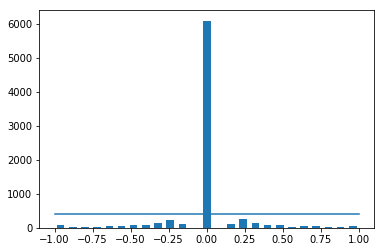

In [5]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
print('total data:', len(data))

In [8]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 5693
remaining: 2242


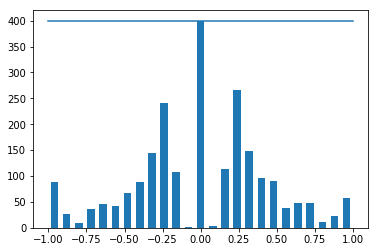

In [9]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [10]:
print(data.iloc[1])

center      center_2021_04_25_11_32_46_568.jpg
left        left_2021_04_25_11_32_46_568.jpg  
right       right_2021_04_25_11_32_46_568.jpg 
steering   -0.15                              
throttle    1                                 
reverse     0                                 
speed       2.55141                           
Name: 13, dtype: object


In [11]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [12]:
image_paths, steerings

(array(['sim_data/IMG\\center_2021_04_25_11_32_45_905.jpg',
        'sim_data/IMG\\left_2021_04_25_11_32_45_905.jpg',
        'sim_data/IMG\\right_2021_04_25_11_32_45_905.jpg', ...,
        'sim_data/IMG\\center_2021_04_25_11_44_21_625.jpg',
        'sim_data/IMG\\left_2021_04_25_11_44_21_625.jpg',
        'sim_data/IMG\\right_2021_04_25_11_44_21_625.jpg'], dtype='<U47'),
 array([ 0.       ,  0.15     , -0.15     , ..., -0.9500002, -0.8000002,
        -1.1000002]))

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 5380
Valid Samples: 1346


Text(0.5, 1.0, 'Validation set')

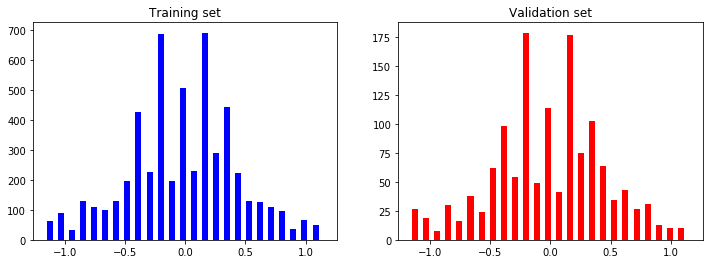

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

## Preprocessing Data

In [26]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200,66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed image')

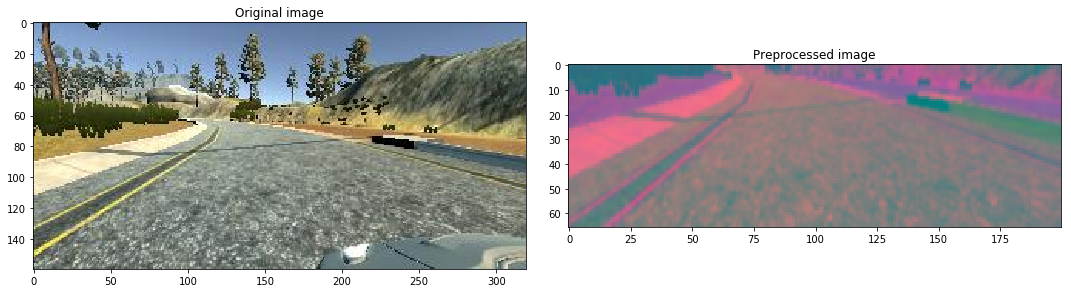

In [27]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')

In [28]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(5380, 66, 200, 3)


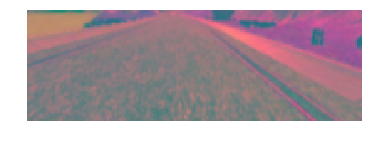

In [29]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)